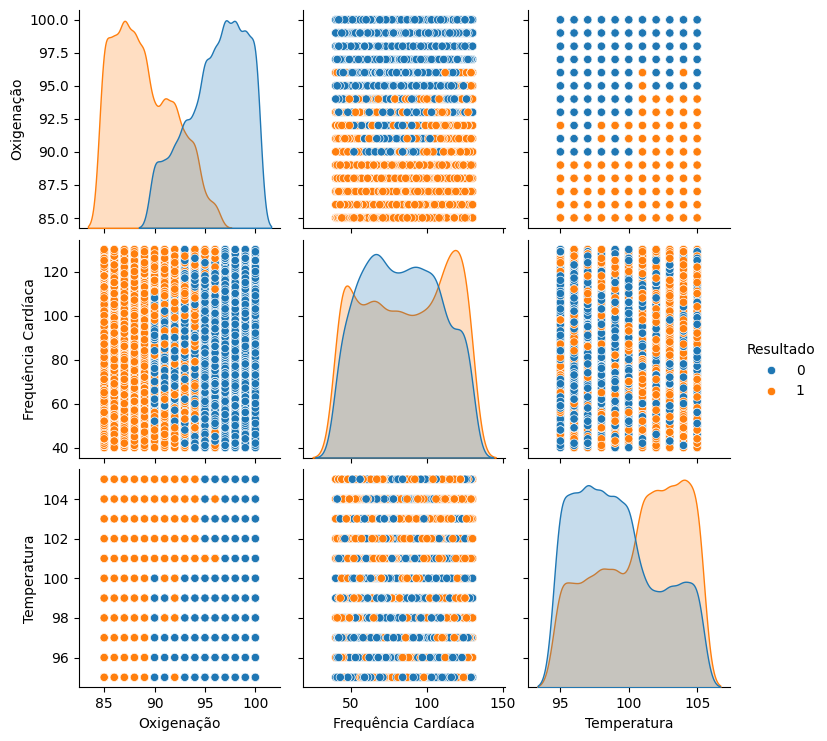

In [29]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import pickle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
%matplotlib inline

df = pd.read_csv('input/dataset-covid-csv/dataset_covid_trad.csv')

# Substitui as palavras Positivo e Negativo por 1 e 0
df['Resultado'].replace(['Positivo','Negativo'],[1,0],inplace=True)

# Variavel para decidir se queremos apresentacoes de debug
debug = 0
if debug == 1:
    # Apresenta as primeiras 5 linhas dos dados
    print(df.head())
    # Apresenta a estrutura do dataframe
    print(df.shape)
    # Apresenta a quantidade de NaN em cada coluna
    print(df.isna().sum())
# define a coluna ID como o indice do df
df.set_index('ID', inplace=True)

# Apresenta a distribuicao inicial dos dados
sns.pairplot(data=df, hue='Resultado')
plt.show()

0.8916666666666667
0.8875714285714286


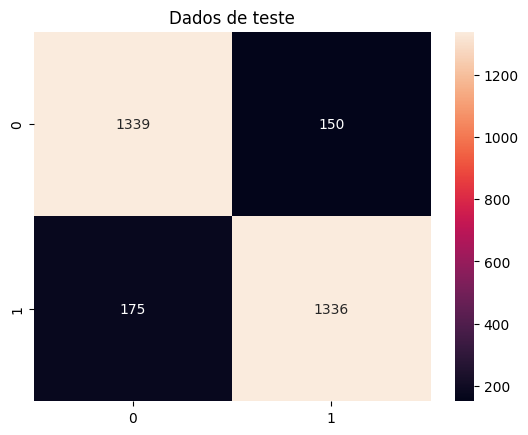

In [35]:
# Separa os dados dos resultados
dados_sem_result = df.drop('Resultado',axis=1) #x
dados_result = df['Resultado'] #y

# Divide os dados em 30% para teste e 70% para treinamento
dados_sem_result_train, dados_sem_result_test, dados_result_train, dados_result_test = train_test_split(dados_sem_result, dados_result, test_size=0.3)

# Cria uma instancia do classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(var_smoothing=1e-25)

# Este comando treina o modelo Naive Bayes nos dados de treinamento. A funcao fit() ajusta o modelo aos dados
model.fit(dados_sem_result_train, dados_result_train)

# Salvar o modelo treinado como um arquivo pickle
with open('model_covid_prediction.pkl', 'wb') as file:
    pickle.dump(model, file)

# Calcula a acuracia do modelo Naive Bayes nos dados de teste
print(model.score(dados_sem_result_test, dados_result_test))
# Calcula a acuracia do modelo Naive Bayes nos dados de treinamento
print(model.score(dados_sem_result_train, dados_result_train))

dados_result_pred = model.predict(dados_sem_result_test)
y_pred_train = model.predict(dados_sem_result_train)
test = confusion_matrix(dados_result_pred, dados_result_test)

# Apresenta os dados de teste em um grafico
plt.title('Dados de teste')
sns.heatmap(data=test, annot=True, fmt='g')
plt.show()


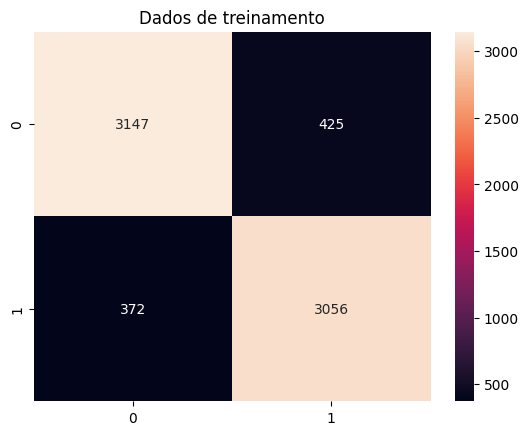

In [31]:
train = confusion_matrix(y_pred_train, dados_result_train)

# Apresenta os dados de treinamento em um grafico
plt.title('Dados de treinamento')
sns.heatmap(data=train,annot=True,fmt='g')
plt.show()